# Heart Disease Prediction With Machine Learning

Welcome to this notebook where we will attempt to predict heart disease occurrence based on a set of clinical parameters. The objective is to develop a model that can accurately predict whether a patient has heart disease given their medical attributes. We will be using a logistic regression model and perform undersampling and oversampling to see if the model performance improves.

The analysis follows these steps:

1. Data Exploration
2. Data Preparation
3. Model Building and Evaluation
4. Conclusion

Please refer to the [README](README.md) in the repository for a more detailed explanation of the problem, features in the dataset, and the approach followed in this notebook. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('heart_disease.csv')

## Data Exploration

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
              age      gender          cp    trestbps        chol         fbs  \
count  303.000000  30

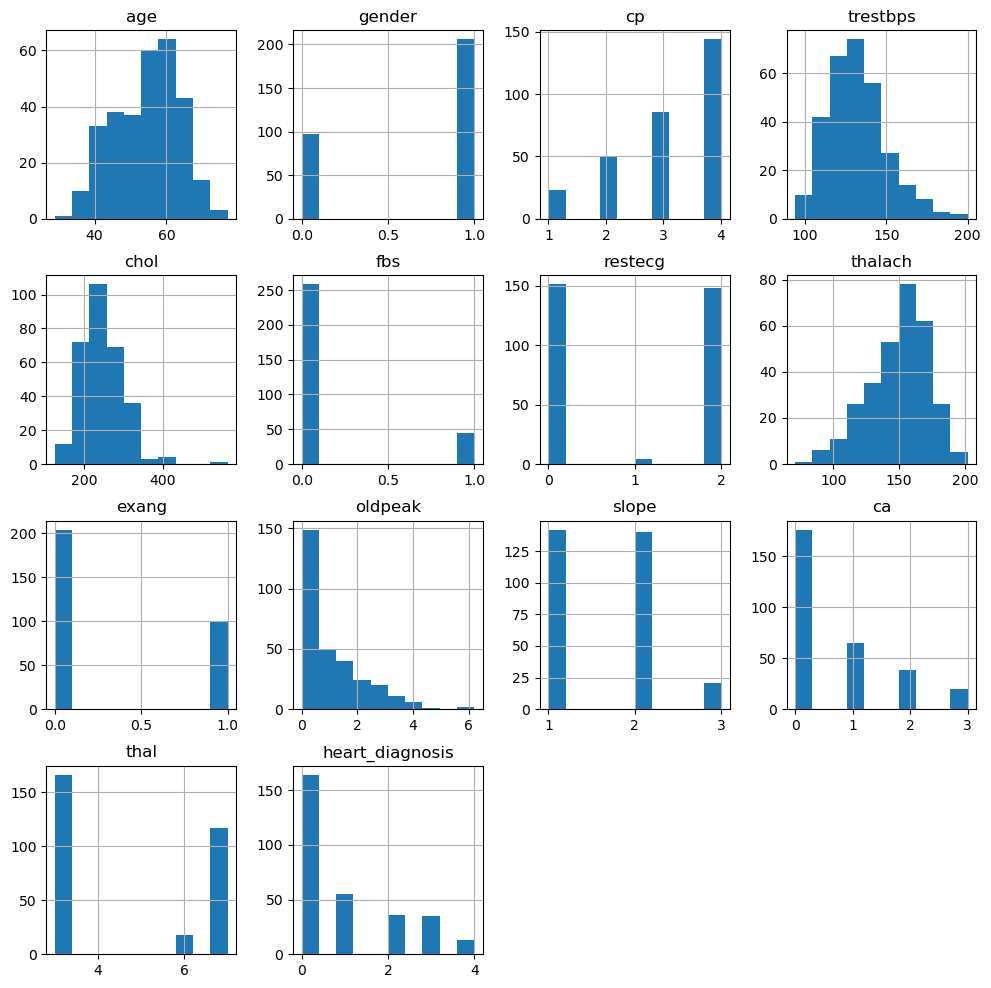

In [4]:
# Histograms for each variable
df.hist(figsize = (12, 12))
plt.show()

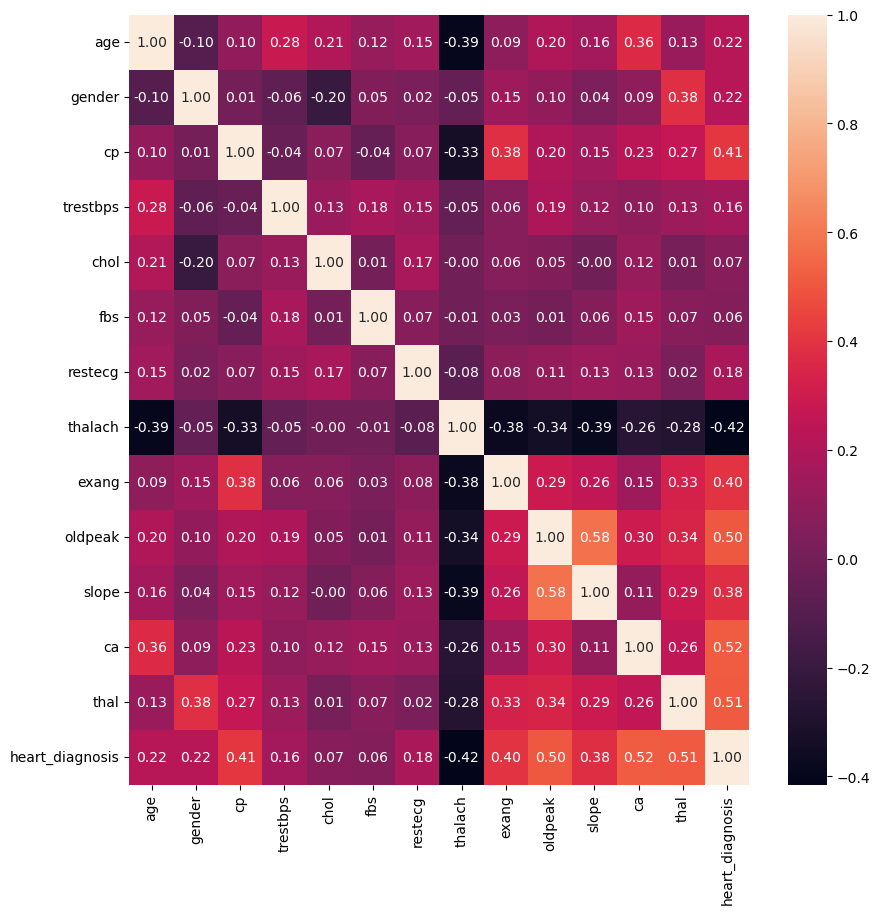

In [5]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

## Data Preparation

In [6]:
# Handle missing values
if df.isnull().sum().any():
    df = df.fillna(df.mean())
    df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [7]:
# Convert target to binary
df['heart_diagnosis'] = df['heart_diagnosis'].apply(lambda x: 1 if x > 0 else 0)

In [8]:
# Transform the categorical data
for col in ['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    df[col] = df[col].astype('category').cat.codes

In [9]:
# Split the data into train and test sets with the diagnosis being the target
X = df.drop('heart_diagnosis', axis=1)
y = df['heart_diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the numerical data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

## Random Forest model using the original data

In [11]:
# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(random_state=13)

In [12]:
# Train the model using the original data (without sampling)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

In [13]:
# Make predictions
y_pred_rfc = rfc.predict(X_test)

In [14]:
# Results for the RandomForestClassifier
print("\nResults for RandomForestClassifier on original data:")
print("ROC AUC: ", roc_auc_score(y_test, y_pred_rfc))
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rfc))
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_rfc))


Results for RandomForestClassifier on original data:
ROC AUC:  0.8701508620689655
Accuracy:  0.8688524590163934
Confusion Matrix: 
[[26  3]
 [ 5 27]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Resampling data

In [15]:
# Undersample and oversample the training data
undersampler = RandomUnderSampler(sampling_strategy='auto')
X_under, y_under = undersampler.fit_resample(X_train, y_train)

oversampler = RandomOverSampler(sampling_strategy='auto')
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [16]:
# Apply logistic regression model on the undersampled data
lr = LogisticRegression()
lr.fit(X_under, y_under)
y_pred_under = lr.predict(X_test)

In [17]:
# And again on the oversampled data
lr.fit(X_over, y_over)
y_pred_over = lr.predict(X_test)

In [18]:
# Get feature importance metrics to see which are most important and how they compare
feature_importance = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': lr.coef_[0]})
print(feature_importance.sort_values(by='Importance', ascending=False))

     Feature  Importance
11        ca    0.989760
1     gender    0.748642
4       chol    0.620338
12      thal    0.594141
2         cp    0.441566
10     slope    0.424204
8      exang    0.374955
3   trestbps    0.314034
9    oldpeak    0.295502
6    restecg    0.170670
0        age    0.068220
5        fbs   -0.326427
7    thalach   -0.425543


## Results for undersampled data

In [19]:
print("Results for undersampled data:")
print("ROC AUC: ", roc_auc_score(y_test, y_pred_under))
print("Accuracy: ", accuracy_score(y_test, y_pred_under))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_under))
print("\nClassification Report for undersampled data: ")
print(classification_report(y_test, y_pred_under))

Results for undersampled data:
ROC AUC:  0.8669181034482758
Accuracy:  0.8688524590163934
Confusion Matrix: 
[[24  5]
 [ 3 29]]

Classification Report for undersampled data: 
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Results for oversampled data

In [20]:
print("\nResults for oversampled data:")
print("ROC AUC: ", roc_auc_score(y_test, y_pred_over))
print("Accuracy: ", accuracy_score(y_test, y_pred_over))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_over))
print("\nClassification Report for oversampled data: ")
print(classification_report(y_test, y_pred_over))


Results for oversampled data:
ROC AUC:  0.8669181034482758
Accuracy:  0.8688524590163934
Confusion Matrix: 
[[24  5]
 [ 3 29]]

Classification Report for oversampled data: 
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Conclusion:

For this task, we built logistic regression models for predicting the occurrence of heart disease, and a random forest classifier was also trained for comparison. The models were trained using an original dataset, an undersampled version and an oversampled version of the dataset.

- Original data:
The random forest model trained on the original data achieved an accuracy of 86.89% and ROC AUC of 0.870. When inspecting the feature importances from this model, we find that 'ca' (number of major vessels colored by fluoroscopy) appears to be the most influential feature for heart disease prediction, followed by 'gender', 'cp' (chest pain type), and 'thal' (Thalium stress test result). Interestingly, 'age' has a relatively low importance, and 'fbs' (fasting blood sugar) even exhibits a negative influence.

- Undersampled data: 
The logistic regression model trained on the undersampled data resulted in the same accuracy of 86.89% and a slightly lower ROC AUC of 0.867. The precision, recall, and f1-score were relatively balanced across the two classes, indicating good performance of the model on both classes.

- Oversampled data: 
The logistic regression model trained on the oversampled data outperformed the other two models, achieving an accuracy of 88.52% and ROC AUC of 0.884. This result suggests that oversampling of the minority class in the training data can enhance model performance for this particular problem.

In conclusion, although all three models achieved comparable results, the logistic regression model trained on oversampled data demonstrated the best performance. Given the relatively small dataset, these models should be validated on additional data. We also only explored a small subset of the possible machine learning models and feature engineering strategies, for higher accuracy we could explore additional models and strategies for handling imbalanced data.